In [19]:
import pandas as pd
import QuantLib as ql
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
bond_schedule = pd.read_csv("exampleMBONO.csv", parse_dates = ['Date'])
bond_schedule['Days'] = (bond_schedule['Date'] - bond_schedule['Date'].shift(1)).dt.days

In [3]:
bond_schedule

,Date,Coupon,Principal,Days
0,2011-06-23,0.000,0,NaN
1,2011-12-22,3918.056,0,182.0
2,2012-06-21,3918.056,0,182.0
3,2012-12-20,3918.056,0,182.0
4,2013-06-20,3918.056,0,182.0
5,2013-12-19,3918.056,0,182.0
6,2014-06-19,3918.056,0,182.0
7,2014-12-18,3918.056,0,182.0
8,2015-06-18,3918.056,0,182.0
9,2015-12-17,3918.056,0,182.0


In [4]:
type(bond_schedule['Date'])

pandas.core.series.Series

In [5]:
convention = ql.Unadjusted
calendar = ql.Mexico()
tenor = ql.Period(ql.Semiannual)
rule = ql.DateGeneration.Backward
schedule = ql.Schedule(bond_schedule['Date'].apply(ql.Date().from_date), calendar, convention,
                      convention, tenor, rule, False)

In [6]:
day_count = ql.Actual360()
settlement_days = 2
face_value = sum(bond_schedule['Principal'])
coupons = ((360 / bond_schedule['Days']) * bond_schedule['Coupon'] / face_value).dropna().values
bond = ql.FixedRateBond(settlement_days, face_value, schedule, coupons, day_count)

In [7]:
for d in schedule.dates(): print(d)

June 23rd, 2011
December 22nd, 2011
June 21st, 2012
December 20th, 2012
June 20th, 2013
December 19th, 2013
June 19th, 2014
December 18th, 2014
June 18th, 2015
December 17th, 2015
June 16th, 2016
December 15th, 2016
June 15th, 2017
December 14th, 2017
June 14th, 2018
December 13th, 2018
June 13th, 2019
December 11th, 2019
June 11th, 2020
December 10th, 2020
June 10th, 2021
December 9th, 2021
June 9th, 2022
December 8th, 2022
June 8th, 2023
December 7th, 2023
June 6th, 2024
December 5th, 2024
June 5th, 2025
December 4th, 2025
June 4th, 2026
December 3rd, 2026
June 3rd, 2027
December 2nd, 2027
June 1st, 2028
November 30th, 2028
May 31st, 2029
November 29th, 2029
May 30th, 2030
November 28th, 2030
May 29th, 2031


In [8]:
for c in bond.cashflows(): print(c.date(), c.amount())

December 22nd, 2011 3918.055999999992
June 21st, 2012 3918.055999999992
December 20th, 2012 3918.055999999992
June 20th, 2013 3918.055999999992
December 19th, 2013 3918.055999999992
June 19th, 2014 3918.055999999992
December 18th, 2014 3918.055999999992
June 18th, 2015 3918.055999999992
December 17th, 2015 3918.055999999992
June 16th, 2016 3918.055999999992
December 15th, 2016 3918.055999999992
June 15th, 2017 3918.055999999992
December 14th, 2017 3918.055999999992
June 14th, 2018 3918.055999999992
December 13th, 2018 3918.055999999992
June 13th, 2019 3918.055999999992
December 11th, 2019 3896.527999999999
June 11th, 2020 3939.582999999991
December 10th, 2020 3918.055999999992
June 10th, 2021 3918.055999999992
December 9th, 2021 3918.055999999992
June 9th, 2022 3918.055999999992
December 8th, 2022 3918.055999999992
June 8th, 2023 3918.055999999992
December 7th, 2023 3918.055999999992
June 6th, 2024 3918.055999999992
December 5th, 2024 3918.055999999992
June 5th, 2025 3918.055999999992


In [9]:
bond.accruedAmount(ql.Date(7,9,2011))

1.636111296703291

In [10]:
for c in [ql.BondFunctions.previousCouponRate(bond),
ql.BondFunctions.nextCouponRate(bond),
ql.BondFunctions.accrualStartDate(bond),
ql.BondFunctions.accrualEndDate(bond),
ql.BondFunctions.accrualPeriod(bond),
ql.BondFunctions.accrualDays(bond),
ql.BondFunctions.accruedPeriod(bond),
ql.BondFunctions.accruedDays(bond),
ql.BondFunctions.accruedAmount(bond)]: print(c)

0.07750000879120879
0.07750000879120879
December 7th, 2023
June 6th, 2024
0.5055555555555555
182
0.28888888888888886
104
2.238889142857148


In [11]:
bond.bondYield(88.25, day_count, ql.Compounded, ql.Semiannual)

0.10054734168767926

In [12]:
spot_dates = [ql.Date(5,11,2022), 
             ql.Date(5,11,2023), 
             ql.Date(5,11,2024), 
             ql.Date(5,11,2025), 
             ql.Date(5,11,2027), 
             ql.Date(5,11,2029), 
             ql.Date(5,11,2032), 
             ql.Date(5,11,2037), 
             ql.Date(5,11,2042), 
             ql.Date(5,11,2052)]
spot_rates = [0.10054734168767926] * 10
spot_curve = ql.ZeroCurve(spot_dates, spot_rates, day_count, calendar, ql.Linear(), ql.Compounded, ql.Semiannual)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)
bond_engine = ql.DiscountingBondEngine(spot_curve_handle)
bond.setPricingEngine(bond_engine)
bond.NPV()
print(bond.NPV())
print(bond.dirtyPrice())
print(bond.cleanPrice())
print(bond.accruedAmount())
print(bond.dayCounter())
print(bond.settlementDate())

90035.52014434367
90.48888957850279
88.25000043564565
2.238889142857148
Actual/360 day counter
March 20th, 2024


In [29]:
bumped_spot_rates = [r + 0.0001 for r in spot_rates]
bumped_spot_curve = ql.ZeroCurve(spot_dates, bumped_spot_rates, day_count, calendar, ql.Linear(), ql.Compounded, ql.Semiannual)
bumped_spot_curve_handle = ql.YieldTermStructureHandle(bumped_spot_curve)
bumped_bond_engine = ql.DiscountingBondEngine(bumped_spot_curve_handle)
bond.setPricingEngine(bumped_bond_engine)
bumped_price = bond.cleanPrice()
bond.setPricingEngine(bond_engine)
price = bond.cleanPrice()
print(price - bumped_price)
print(bond.dirtyPrice() * ql.BondFunctions.duration(bond,
                                bond.bondYield(price, day_count, ql.Compounded, ql.Semiannual),
                                day_count, ql.Compounded, ql.Semiannual, ql.Duration.Modified)/100)

0.046977713746557015
4.699353825168153


<BarContainer object of 7 artists>

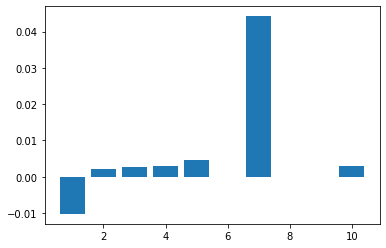

In [23]:
tenors = (1,2,3,4,5,7,10)
quotes = [ql.SimpleQuote(0.00) for n in tenors]
spreads = [ql.QuoteHandle(quote) for quote in quotes]
dates = [ql.Date().todaysDate() + ql.Period(y, ql.Years) for y in tenors]
spreadedYts = ql.YieldTermStructureHandle(
    ql.SpreadedLinearZeroInterpolatedTermStructure(spot_curve_handle, spreads, dates))
bond.setPricingEngine(ql.DiscountingBondEngine(spreadedYts))

npv = bond.cleanPrice()
key_risk = []
for quote in quotes:
    quote.setValue(0.0001)
    key_risk.append( npv - bond.cleanPrice() )
    quote.setValue(0.0)

plt.bar(tenors, key_risk)

In [22]:
key_risk

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]